<a href="https://colab.research.google.com/github/dsreliete/Womakerscode_DA_desafio_individual/blob/main/Desafio6IndividualElietedaSilvaRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

In [111]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode_DA_desafio_individual/refs/heads/main/kc_house_data.csv.xls"
df_house = pd.read_csv(url)

df_house['date'] = pd.to_datetime(df_house['date'])
df_house['year'] = df_house['date'].dt.year
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,n,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,n,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,n,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,n,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,n,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3222049055,2015-01-16,650000.0,3,1.75,2800,19386,1.0,y,4,...,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450,2015
9995,7352200100,2015-02-24,1360000.0,2,1.75,2620,14138,2.0,y,4,...,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279,2015
9996,3124059023,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,y,4,...,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015
9997,7352200025,2014-10-13,1190000.0,2,1.75,2080,8112,1.0,y,4,...,1040,1040,1939,1984,98125,47.7134,-122.277,2030,8408,2014


In [112]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9999 non-null   int64         
 1   date           9999 non-null   datetime64[ns]
 2   price          9999 non-null   float64       
 3   bedrooms       9999 non-null   int64         
 4   bathrooms      9999 non-null   float64       
 5   sqft_living    9999 non-null   int64         
 6   sqft_lot       9999 non-null   int64         
 7   floors         9999 non-null   float64       
 8   waterfront     9999 non-null   object        
 9   view           9999 non-null   int64         
 10  condition      9999 non-null   int64         
 11  grade          9999 non-null   int64         
 12  sqft_above     9999 non-null   int64         
 13  sqft_basement  9999 non-null   int64         
 14  yr_built       9999 non-null   int64         
 15  yr_renovated   9999 n

In [113]:
# 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

df_house_numericas = df_house.select_dtypes(include='number')

matriz_correlacao = df_house_numericas.corr()
matriz_correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
id,1.000000,0.005779,0.013855,0.007435,0.000415,-0.132510,0.012260,0.035295,-0.021744,0.012872,-0.007168,0.013732,0.011701,-0.015580,0.001720,0.000568,0.000084,-0.004075,-0.146583,0.009582
price,0.005779,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809,0.002658
bedrooms,0.013855,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946,-0.003340
bathrooms,0.007435,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278,-0.028182
sqft_living,0.000415,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839,-0.027845
sqft_lot,-0.132510,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367,0.000665
floors,0.012260,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016,-0.030368
view,0.035295,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554,0.012744
condition,-0.021744,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178,-0.048223
grade,0.012872,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770,-0.027026


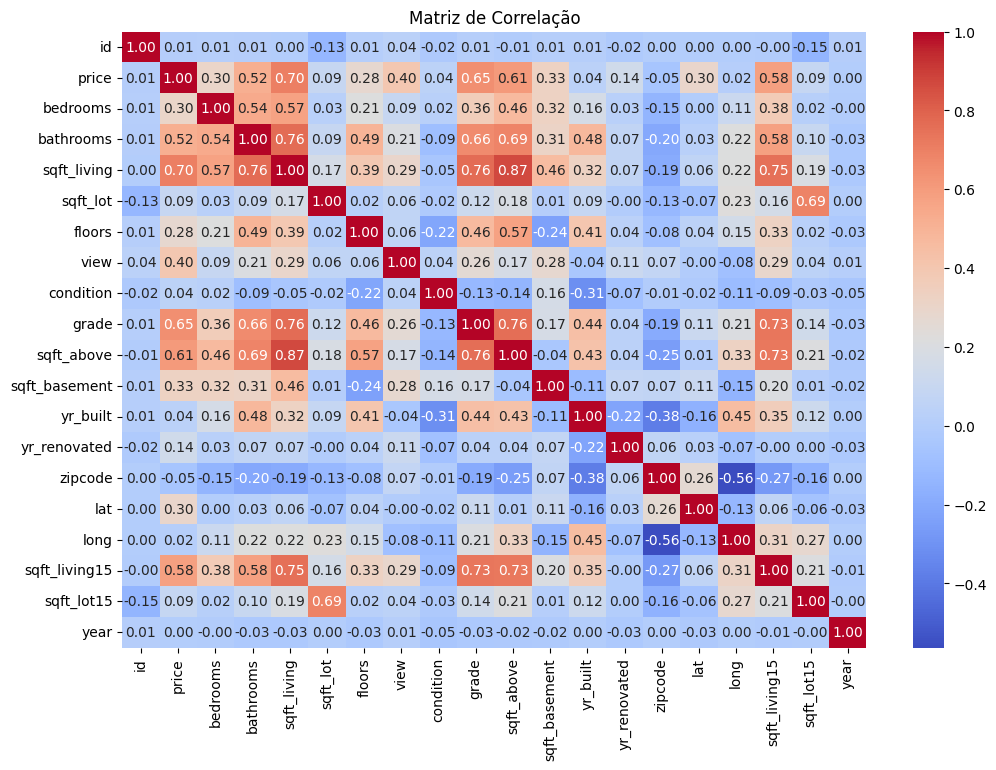

In [114]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [115]:
correlacao_preco_quartos = df_house['price'].corr(df_house['bedrooms'])
print(f'Correlação entre preco e número de quartos: {correlacao_preco_quartos:.2f}')

casas_2000 = df_house[df_house['sqft_living'] > 2000]
correlacao_preco_quartos_2000 = casas_2000['price'].corr(casas_2000['bedrooms'])
print(f'Correlação entre preco e número de quartos (casas com área > 2000 sqft): {correlacao_preco_quartos_2000:.2f}')

print(f"considerando que a correlação entre preço dos imóveis e número de quartos resultou em {correlacao_preco_quartos} e a correlação entre preço dos imóveis com 2000 sqft ou mais resultou em {correlacao_preco_quartos_2000} foi positiva e próximo de zero é possível inferir que há uma correlacao positiva em ambos os casos onde se uma das variaveis aumenta a outra tende a aumentar também, ou seja podemos dizer que o preco dos imoveis tendem a aumentar conforme o numero de quartos do imóvel aumenta.")

Correlação entre preco e número de quartos: 0.30
Correlação entre preco e número de quartos (casas com área > 2000 sqft): 0.12
considerando que a correlação entre preço dos imóveis e número de quartos resultou em 0.29920721616918206 e a correlação entre preço dos imóveis com 2000 sqft ou mais resultou em 0.11912115548964147 foi positiva e próximo de zero é possível inferir que há uma correlacao positiva em ambos os casos onde se uma das variaveis aumenta a outra tende a aumentar também, ou seja podemos dizer que o preco dos imoveis tendem a aumentar conforme o numero de quartos do imóvel aumenta.


In [116]:
# 2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

casas_banheiros = df_house[df_house['bathrooms'] >= 2]
correlacao_preco_area = casas_banheiros['price'].corr(casas_banheiros['sqft_living'])
print(f'Correlação entre preço e área total da casa em casas com pelo menos dois banheiros): {correlacao_preco_area:.2f}')
print(f"A correlação entre os precos das casas e a area total dos imoveis com pelo menos dois banheiros é {correlacao_preco_area}, o que indica que há uma forte correlcao positiva onde se uma das variaveis aumenta a outra tende a aumentar também")

Correlação entre preço e área total da casa em casas com pelo menos dois banheiros): 0.71
A correlação entre os precos das casas e a area total dos imoveis com pelo menos dois banheiros é 0.7067107107996193, o que indica que há uma forte correlcao positiva onde se uma das variaveis aumenta a outra tende a aumentar também


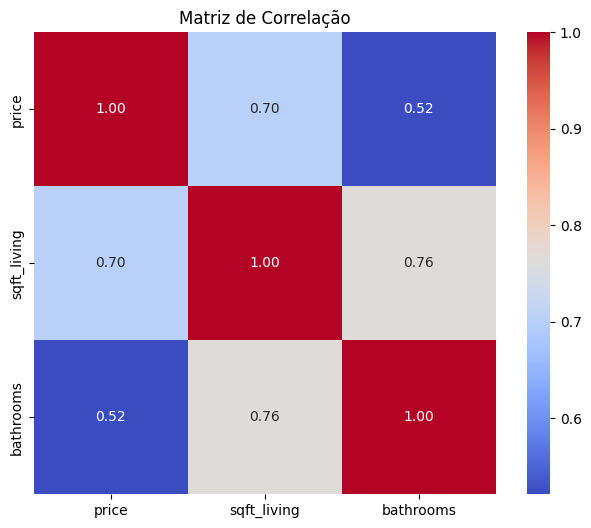

A correlacao entre priços e sqft_living é positiva. Isso indica que, em geral, casas com maior área total tendem a ter preços mais altos, já entre prices e bathrooms não tão forte quanto price e sqft_living. Isso pode indicar que, embora mais banheiros possam aumentar o valor da casa, a área total é um fator mais determinante no preço. A correlacao entre sqft_living e bathrooms pode ser moderada, sugerindo que casas maiores tendem a ter mais banheiros, mas essa relação não é tão forte.


In [117]:
# 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

variables_of_interest = df_house[['price', 'sqft_living', 'bathrooms']]
correlation_matrix = variables_of_interest.corr()
correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

print("A correlacao entre priços e sqft_living é positiva. Isso indica que, em geral, casas com maior área total tendem a ter preços mais altos, já entre prices e bathrooms não tão forte quanto price e sqft_living. Isso pode indicar que, embora mais banheiros possam aumentar o valor da casa, a área total é um fator mais determinante no preço. A correlacao entre sqft_living e bathrooms pode ser moderada, sugerindo que casas maiores tendem a ter mais banheiros, mas essa relação não é tão forte.")

   condition         price
0          2  7.150000e+05
1          3  1.016932e+06
2          4  1.087104e+06
3          5  1.292893e+06


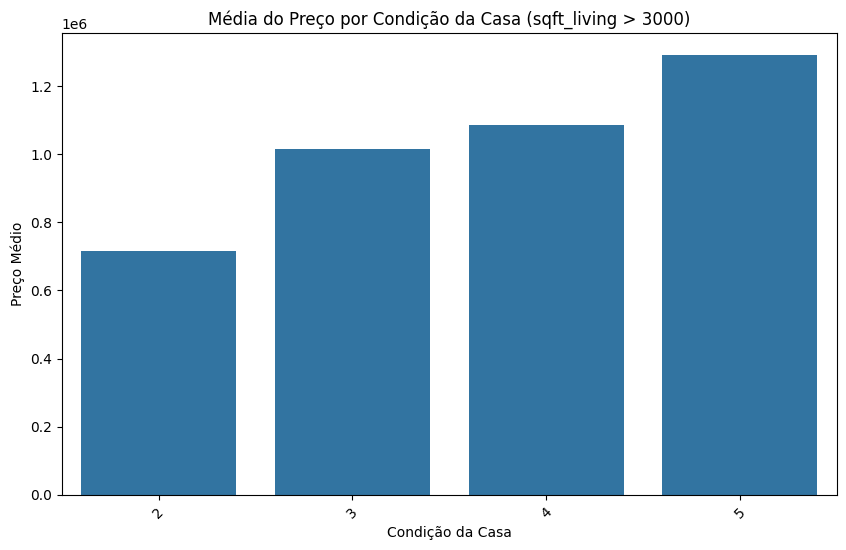

F-statistic: 5.47
p-value: 0.0010
Se o p-valor for menor que 0.05 (ou outro nível de significância que você escolher), você pode rejeitar a hipótese nula. Isso significa que há evidências suficientes para afirmar que pelo menos uma condição tem um preço médio significativamente diferente das outras.
Correlação entre preço e condição da casa (3): -0.08
Correlação entre preço e condição da casa (4): 0.03
Correlação entre preço e condição da casa (5): 0.10
Correlação entre preço e condição da casa (2): -0.02


In [118]:
# 4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

casas_3000 = df_house[df_house['sqft_living'] > 3000]
precos_condicao = casas_3000.groupby('condition')['price'].mean().reset_index()
print(precos_condicao)

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=precos_condicao)
plt.title('Média do Preço por Condição da Casa (sqft_living > 3000)')
plt.xlabel('Condição da Casa')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

groups = [group['price'].values for name, group in casas_3000.groupby('condition')]
f_statistic, p_value = stats.f_oneway(*groups)

print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
  print("Se o p-valor for menor que 0.05 (ou outro nível de significância que você escolher), você pode rejeitar a hipótese nula. Isso significa que há evidências suficientes para afirmar que pelo menos uma condição tem um preço médio significativamente diferente das outras.")
else:
  print("Se o p-valor for maior que 0.05, você não tem evidências suficientes para rejeitar a hipótese nula, sugerindo que não há diferença significativa entre os preços das diferentes condições.")

# Outra forma de responder a questao
for condition_value in casas_3000['condition'].unique():
  correlation = casas_3000['price'].corr(casas_3000['condition'] == condition_value)
  print(f'Correlação entre preço e condição da casa ({condition_value}): {correlation:.2f}')

# Intrepretar correlacao de cada item


In [119]:
# 5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

casas_quartos_3 = df_house[df_house['bedrooms'] >= 3]
matriz_correlcao = casas_quartos_3[['price', 'lat', 'long']].corr()
matriz_correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
id,1.000000,0.005779,0.013855,0.007435,0.000415,-0.132510,0.012260,0.035295,-0.021744,0.012872,-0.007168,0.013732,0.011701,-0.015580,0.001720,0.000568,0.000084,-0.004075,-0.146583,0.009582
price,0.005779,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809,0.002658
bedrooms,0.013855,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946,-0.003340
bathrooms,0.007435,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278,-0.028182
sqft_living,0.000415,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839,-0.027845
sqft_lot,-0.132510,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367,0.000665
floors,0.012260,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016,-0.030368
view,0.035295,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554,0.012744
condition,-0.021744,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178,-0.048223
grade,0.012872,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770,-0.027026


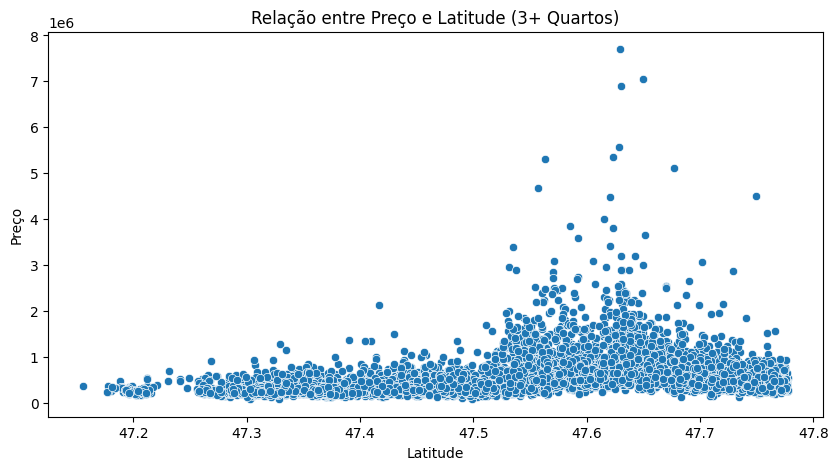

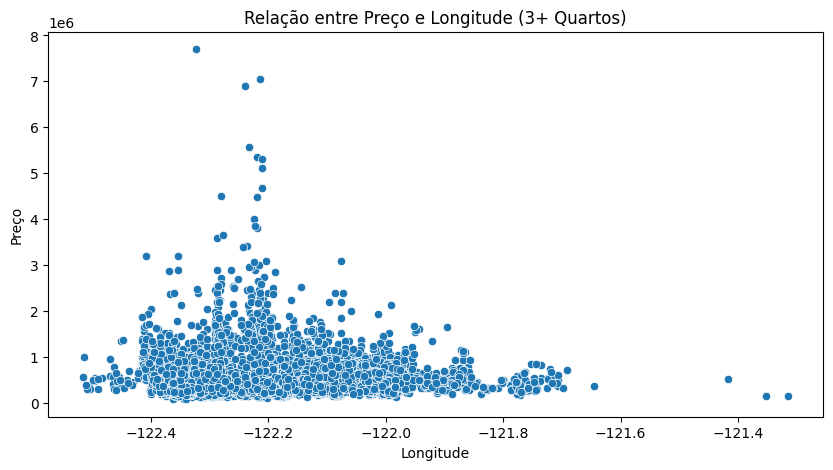

In [120]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='lat', y='price', data=casas_quartos_3)
plt.title('Relação entre Preço e Latitude (3+ Quartos)')
plt.xlabel('Latitude')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='long', y='price', data=casas_quartos_3)
plt.title('Relação entre Preço e Longitude (3+ Quartos)')
plt.xlabel('Longitude')
plt.ylabel('Preço')
plt.show()

In [121]:
# 6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

modelo = smf.ols('price ~ C(waterfront)', data=df_house).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
anova_table
print("O valor-p para C(waterfront) é extremamente pequeno (1.23e-34), muito menor que 0.05. Isso leva à conclusão de que há uma relação estatisticamente significativa entre a presença de uma vista para a água (waterfront) e o preço de uma casa. Casas com vista para a água tendem a ter um preço significativamente diferente (provavelmente maior) em comparação com casas sem vista para a água.")

# Valores da Tabela:
# sum_sq: Soma dos quadrados, que mede a variabilidade total. Divide-se em variabilidade explicada pelo modelo e variabilidade residual.
# df: Graus de liberdade, que refletem o número de grupos e o número total de observações.
# F: Estatística F, que indica a relação entre a variabilidade entre os grupos e a variabilidade dentro dos grupos.
# PR(>F): O p-valor associado à estatística F.
# Significância:
# Se o p-valor (PR(>F)) for menor que 0,05, você pode concluir que há uma diferença significativa nos preços entre as casas com e sem vista para a água.
# Se o p-valor for maior que 0,05, não há evidências suficientes para afirmar que os preços são diferentes entre os grupos.


O valor-p para C(waterfront) é extremamente pequeno (1.23e-34), muito menor que 0.05. Isso leva à conclusão de que há uma relação estatisticamente significativa entre a presença de uma vista para a água (waterfront) e o preço de uma casa. Casas com vista para a água tendem a ter um preço significativamente diferente (provavelmente maior) em comparação com casas sem vista para a água.


In [122]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode_DA_desafio_individual/refs/heads/main/car_price.csv.xls"
df_car = pd.read_csv(url)
df_car

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
1870,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
1871,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
1872,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0


In [123]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

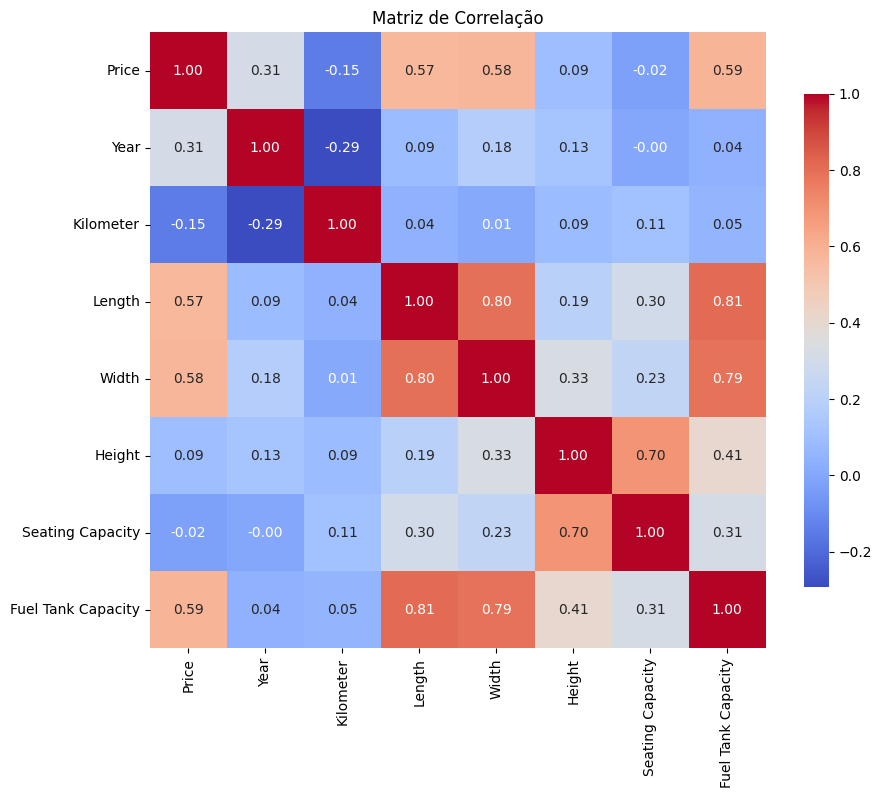

In [124]:
# 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

df_car_numericas = df_car.select_dtypes(include='number')

matriz_correlacao = df_car_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação")
plt.show()

In [125]:
correlacao_positiva = matriz_correlacao['Length']['Fuel Tank Capacity']
correlacao_negativa = matriz_correlacao['Year']['Kilometer']
correlacao_neutra = matriz_correlacao['Seating Capacity']['Year']

print(f"C correlação positiva: {correlacao_positiva}")
print(f"C correlação negativa: {correlacao_negativa}")
print(f"C correlação neutra: {correlacao_neutra}")

C correlação positiva: 0.809812094577022
C correlação negativa: -0.2917399243127008
C correlação neutra: -0.00011304768643099114


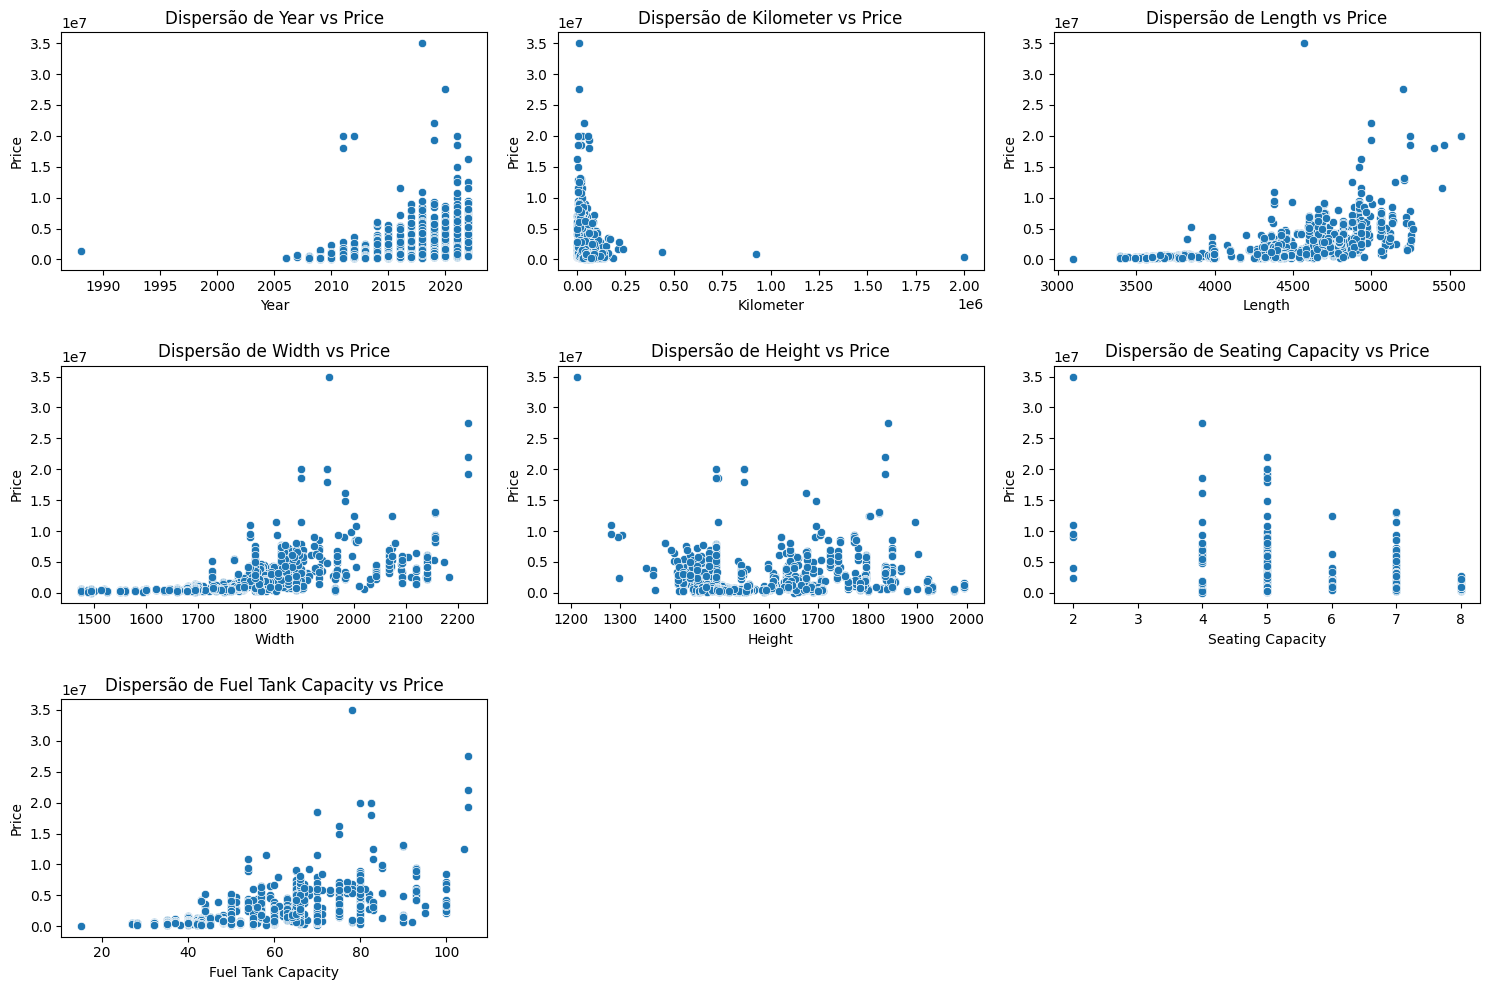

In [126]:
# 8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

cols_numerica = df_car.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_numerica.remove('Price')

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_numerica):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df_car, x=col, y='Price')
    plt.title(f'Dispersão de {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          2.59e-173
Time:                        17:38:00   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

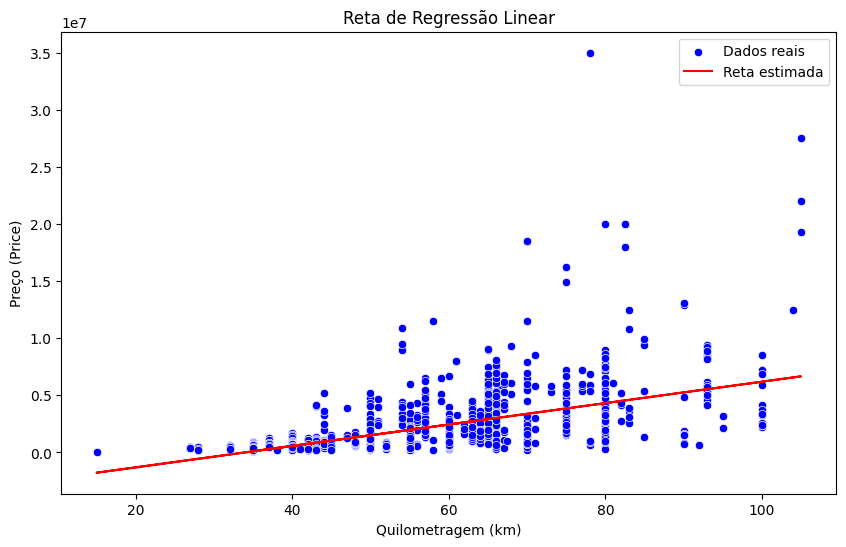

In [136]:
# 9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada

X = df_car['Fuel Tank Capacity']
y = df_car['Price']

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_car['Fuel Tank Capacity'], y=df_car['Price'], label='Dados reais', color='blue')
plt.plot(df_car['Fuel Tank Capacity'], modelo.predict(X), color='red', label='Reta estimada')
plt.title('Reta de Regressão Linear')
plt.xlabel('Quilometragem (km)')
plt.ylabel('Preço (Price)')
plt.legend()
plt.show()

In [128]:
# 10.Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.


In [129]:
# 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.